In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from pathlib import Path

# path: the path relative to desktop
def plt_savefig(path):

    return plt.savefig(
        (Path('~/Desktop') / path).expanduser(),
        bbox_inches='tight',  # or the labels will be cut
        dpi=600
    )

In [4]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [5]:
df_fair = sm.datasets.fair.load_pandas().data
df_fair_sample = df_fair.sample(frac=0.1, random_state=20190425)

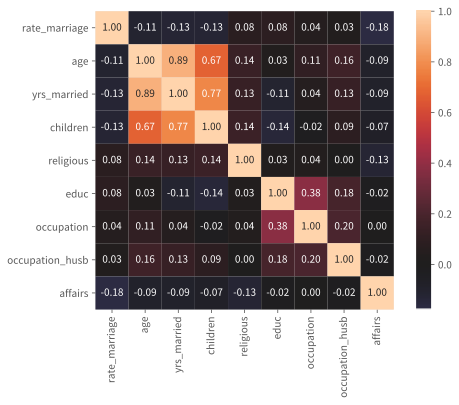

In [6]:
df = df_fair
sns.heatmap(df.corr(), center=0, square=True, annot=True, fmt='.2f')

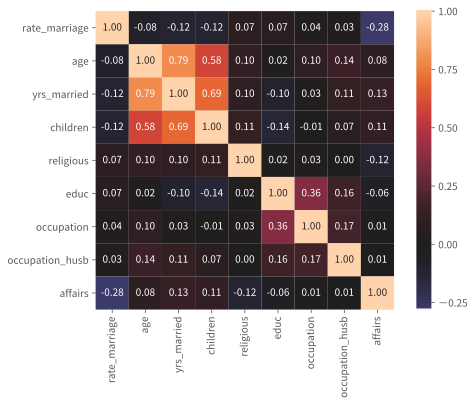

In [7]:
df = df_fair
sns.heatmap(df.corr('kendall'), center=0, square=True, annot=True, fmt='.2f')
# plt_savefig('fair_corr_kendall.png')

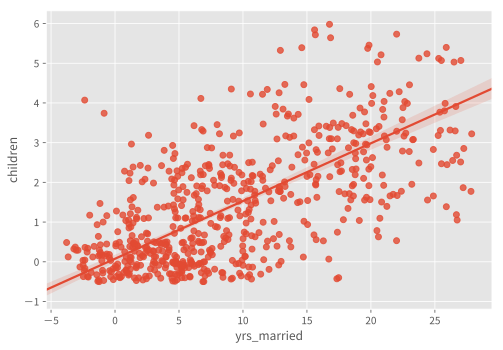

In [8]:
df = df_fair_sample
sns.regplot(
    data=df, x='yrs_married', y='children',
     x_jitter=10/2, y_jitter=1/2,
)
# plt_savefig('children ~ yrs_married.png')

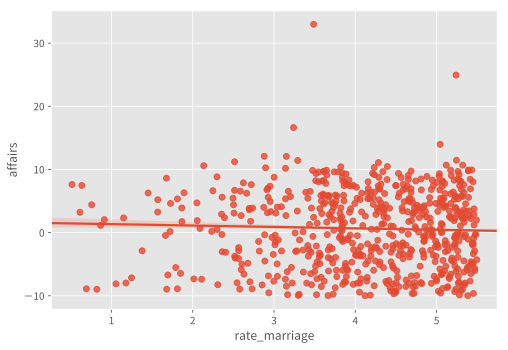

In [9]:
df = df_fair_sample
sns.regplot(
    data=df, x='rate_marriage', y='affairs',
    x_jitter=1/2, y_jitter=20/2,
)
# plt_savefig('affairs ~ rate_marriage.png')

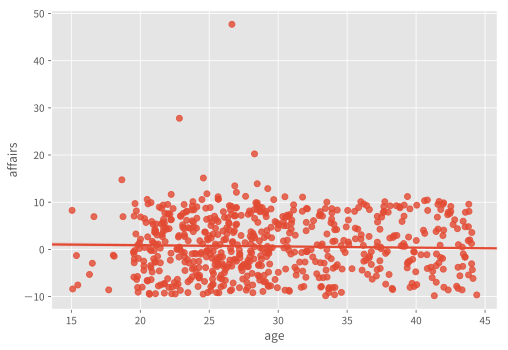

In [10]:
df = df_fair_sample
sns.regplot(
    data=df, x='age', y='affairs',
    x_jitter=5/2, y_jitter=20/2,
)

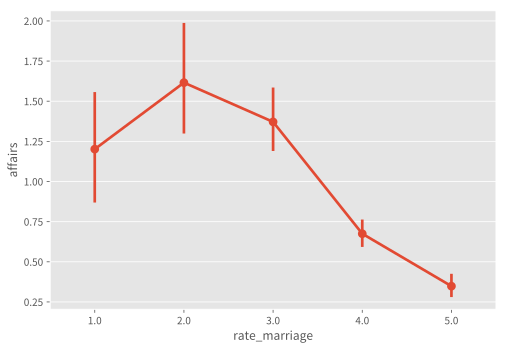

In [11]:
df = df_fair
sns.pointplot(data=df, x='rate_marriage', y='affairs')
# plt_savefig('affairs ~ 0 + C(rate_marriage).png')

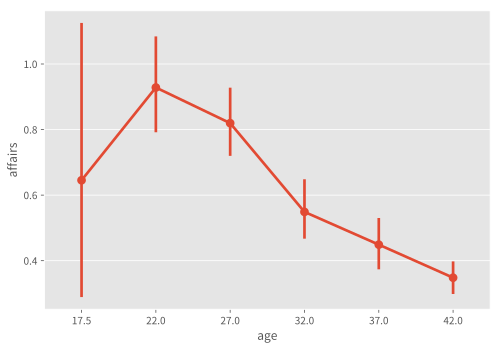

In [12]:
df = df_fair
sns.pointplot(data=df, x='age', y='affairs')

In [13]:
df = df_fair
smf.ols('affairs ~ rate_marriage', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.66e-46
Time:                        16:22:07   Log-Likelihood:                -13959.
No. Observations:                6366   AIC:                         2.792e+04
Df Residuals:                    6364   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3825      0.119     19.969      0.000       2.149       2.616
rate_marriage    -0.4081      0.028    -14.436      0.000      -0.464      -0.353
==============================================================================
Omnibus:                     9443.528   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5215639.758
Skew:                           8.930   Prob(JB):                         0.00
Kurtosis:                     142.083   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df = df_fair
(smf
 .ols('affairs ~ rate_marriage', df)
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.66e-46
Time:                        16:22:07   Log-Likelihood:                -13959.
No. Observations:                6366   AIC:                         2.792e+04
Df Residuals:                    6364   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3825      0.119     19.969      0.000       2.149       2.616
rate_marriage    -0.4081      0.028    -14.436      0.000      -0.464      -0.353
==============================================================================
Omnibus:                     9443.528   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5215639.758
Skew:                           8.930   Prob(JB):                         0.00
Kurtosis:                     142.083   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df = df_fair
(smf
 .ols('affairs ~ C(rate_marriage)', df)
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:07   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.218      5.524      0.000       0.775       1.628
C(rate_marriage)[T.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage)[T.3.0]     0.1696      0.228      0.743      0.457      -0.278       0.617
C(rate_marriage)[T.4.0]    -0.5268      0.222     -2.370      0.018      -0.963      -0.091
C(rate_marriage)[T.5.0]    -0.8535      0.222     -3.853      0.000      -1.288      -0.419
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df = df_fair
(smf
 .ols('affairs ~ 0 + C(rate_marriage)', df)
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:07   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(rate_marriage)[1.0]     1.2017      0.218      5.524      0.000       0.775       1.628
C(rate_marriage)[2.0]     1.6157      0.116     13.925      0.000       1.388       1.843
C(rate_marriage)[3.0]     1.3713      0.069     19.963      0.000       1.237       1.506
C(rate_marriage)[4.0]     0.6748      0.046     14.762      0.000       0.585       0.764
C(rate_marriage)[5.0]     0.3482      0.042      8.333      0.000       0.266       0.430
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage, Treatment(reference=5))', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:07   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.3482      0.042      8.333      0.000       0.266       0.430
C(rate_marriage, Treatment(reference=5))[T.1.0]     0.8535      0.222      3.853      0.000       0.419       1.288
C(rate_marriage, Treatment(reference=5))[T.2.0]     1.2676      0.123     10.278      0.000       1.026       1.509
C(rate_marriage, Treatment(reference=5))[T.3.0]     1.0231      0.080     12.725      0.000       0.865       1.181
C(rate_marriage, Treatment(reference=5))[T.4.0]     0.3267      0.062      5.275      0.000       0.205       0.448
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         8.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df = df_fair
smf.ols('affairs ~ 0 + C(rate_marriage, Diff)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:07   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(rate_marriage, Diff)[D.1.0]     1.0423      0.053     19.791      0.000       0.939       1.146
C(rate_marriage, Diff)[D.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage, Diff)[D.3.0]    -0.2445      0.135     -1.813      0.070      -0.509       0.020
C(rate_marriage, Diff)[D.4.0]    -0.6964      0.083     -8.441      0.000      -0.858      -0.535
C(rate_marriage, Diff)[D.5.0]    -0.3267      0.062     -5.275      0.000      -0.448      -0.205
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df = df_fair
smf.ols('affairs ~ 0 + C(rate_marriage, Sum)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:07   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(rate_marriage, Sum)[mean]      1.0423      0.053     19.791      0.000       0.939       1.146
C(rate_marriage, Sum)[S.1.0]     0.1593      0.177      0.902      0.367      -0.187       0.505
C(rate_marriage, Sum)[S.2.0]     0.5734      0.104      5.504      0.000       0.369       0.778
C(rate_marriage, Sum)[S.3.0]     0.3289      0.075      4.394      0.000       0.182       0.476
C(rate_marriage, Sum)[S.4.0]    -0.3675      0.063     -5.791      0.000      -0.492      -0.243
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df = df_fair
smf.ols('affairs ~ 0 + C(rate_marriage, Sum(omit=1))', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:07   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
C(rate_marriage, Sum(omit=1))[mean]      1.0423      0.053     19.791      0.000       0.939       1.146
C(rate_marriage, Sum(omit=1))[S.2.0]     0.5734      0.104      5.504      0.000       0.369       0.778
C(rate_marriage, Sum(omit=1))[S.3.0]     0.3289      0.075      4.394      0.000       0.182       0.476
C(rate_marriage, Sum(omit=1))[S.4.0]    -0.3675      0.063     -5.791      0.000      -0.492      -0.243
C(rate_marriage, Sum(omit=1))[S.5.0]    -0.6942      0.062    -11.230      0.000      -0.815      -0.573
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         4.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df = df_fair
smf.ols('affairs ~ age', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     51.93
Date:                Wed, 01 May 2019   Prob (F-statistic):           6.42e-13
Time:                        16:22:07   Log-Likelihood:                -14036.
No. Observations:                6366   AIC:                         2.808e+04
Df Residuals:                    6364   BIC:                         2.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5472      0.120     12.891      0.000       1.312       1.783
age           -0.0289      0.004     -7.206      0.000      -0.037      -0.021
==============================================================================
Omnibus:                     9300.752   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4675657.321
Skew:                           8.694   Prob(JB):                         0.00
Kurtosis:                     134.624   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df = df_fair
smf.ols('affairs ~ C(age)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.81
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.16e-11
Time:                        16:22:07   Log-Likelihood:                -14032.
No. Observations:                6366   AIC:                         2.808e+04
Df Residuals:                    6360   BIC:                         2.812e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6453      0.186      3.468      0.001       0.281       1.010
C(age)[T.22.0]     0.2830      0.193      1.465      0.143      -0.096       0.662
C(age)[T.27.0]     0.1742      0.193      0.904      0.366      -0.203       0.552
C(age)[T.32.0]    -0.0965      0.198     -0.488      0.626      -0.484       0.291
C(age)[T.37.0]    -0.1964      0.205     -0.956      0.339      -0.599       0.206
C(age)[T.42.0]    -0.2972      0.202     -1.473      0.141      -0.693       0.098
==============================================================================
Omnibus:                     9302.228   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4681262.758
Skew:                           8.697   Prob(JB):                         0.00
Kurtosis:                     134.704   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
df = df_fair
smf.ols('affairs ~ 0 + C(age, Diff)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.81
Date:                Wed, 01 May 2019   Prob (F-statistic):           2.16e-11
Time:                        16:22:07   Log-Likelihood:                -14032.
No. Observations:                6366   AIC:                         2.808e+04
Df Residuals:                    6360   BIC:                         2.812e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(age, Diff)[D.17.5]     0.6231      0.040     15.529      0.000       0.544       0.702
C(age, Diff)[D.22.0]     0.2830      0.193      1.465      0.143      -0.096       0.662
C(age, Diff)[D.27.0]    -0.1087      0.072     -1.513      0.130      -0.250       0.032
C(age, Diff)[D.32.0]    -0.2708      0.084     -3.237      0.001      -0.435      -0.107
C(age, Diff)[D.37.0]    -0.0999      0.110     -0.908      0.364      -0.316       0.116
C(age, Diff)[D.42.0]    -0.1008      0.117     -0.862      0.389      -0.330       0.128
==============================================================================
Omnibus:                     9302.228   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4681262.758
Skew:                           8.697   Prob(JB):                         0.00
Kurtosis:                     134.704   Cond. No.                         7.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df = df_fair
smf.ols('affairs ~ religious', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     102.6
Date:                Wed, 01 May 2019   Prob (F-statistic):           6.37e-24
Time:                        16:22:07   Log-Likelihood:                -14011.
No. Observations:                6366   AIC:                         2.803e+04
Df Residuals:                    6364   BIC:                         2.804e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4718      0.080     18.286      0.000       1.314       1.630
religious     -0.3159      0.031    -10.127      0.000      -0.377      -0.255
==============================================================================
Omnibus:                     9298.402   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4648117.716
Skew:                           8.692   Prob(JB):                         0.00
Kurtosis:                     134.230   Cond. No.                         8.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df = df_fair
(smf
 .ols('affairs ~ rate_marriage*religious', df)
 .fit()
 .summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 01 May 2019   Prob (F-statistic):           4.55e-68
Time:                        16:22:07   Log-Likelihood:                -13904.
No. Observations:                6366   AIC:                         2.782e+04
Df Residuals:                    6362   BIC:                         2.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.6495      0.347     13.395      0.000       3.969       5.330
rate_marriage              -0.7891      0.082     -9.622      0.000      -0.950      -0.628
religious                  -0.9846      0.138     -7.122      0.000      -1.256      -0.714
rate_marriage:religious     0.1681      0.032      5.209      0.000       0.105       0.231
==============================================================================
Omnibus:                     9399.882   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5196635.028
Skew:                           8.843   Prob(JB):                         0.00
Kurtosis:                     141.848   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

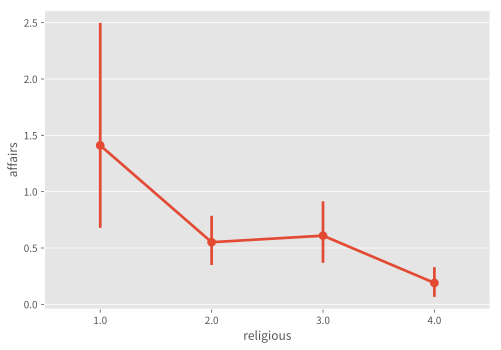

In [26]:
df = df_fair_sample
sns.pointplot(data=df, x='religious', y='affairs')

In [27]:
df = df_fair
smf.ols('affairs ~ C(religious)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     35.75
Date:                Wed, 01 May 2019   Prob (F-statistic):           6.66e-23
Time:                        16:22:07   Log-Likelihood:                -14008.
No. Observations:                6366   AIC:                         2.802e+04
Df Residuals:                    6362   BIC:                         2.805e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.2470      0.068     18.231      0.000       1.113       1.381
C(religious)[T.2.0]    -0.4797      0.082     -5.824      0.000      -0.641      -0.318
C(religious)[T.3.0]    -0.7020      0.082     -8.608      0.000      -0.862      -0.542
C(religious)[T.4.0]    -1.0066      0.109     -9.204      0.000      -1.221      -0.792
==============================================================================
Omnibus:                     9285.668   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4607500.498
Skew:                           8.671   Prob(JB):                         0.00
Kurtosis:                     133.651   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
df = df_fair
res = (smf
       .ols('affairs'
            '~ C(rate_marriage)*C(religious)', df)
       .fit())
display(res.summary(),
        sm.stats.anova_lm(res, typ=3))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.95
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.46e-66
Time:                        16:22:07   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       1.3341      0.505      2.640      0.008       0.344       2.325
C(rate_marriage)[T.2.0]                         1.9654      0.581      3.384      0.001       0.827       3.104
C(rate_marriage)[T.3.0]                         1.0479      0.530      1.977      0.048       0.009       2.087
C(rate_marriage)[T.4.0]                        -0.3282      0.518     -0.633      0.527      -1.344       0.688
C(rate_marriage)[T.5.0]                        -0.6430      0.516     -1.246      0.213      -1.654       0.368
C(religious)[T.2.0]                             0.1143      0.619      0.185      0.853      -1.099       1.327
C(religious)[T.3.0]                            -0.3413      0.613     -0.556      0.578      -1.544       0.861
C(religious)[T.4.0]                            -0.6082      0.955     -0.637      0.524      -2.480       1.264
C(rate_marriage)[T.2.0]:C(religious)[T.2.0]    -1.8103      0.705     -2.569      0.010      -3.192      -0.429
C(rate_marriage)[T.3.0]:C(religious)[T.2.0]    -1.1905      0.648     -1.837      0.066      -2.461       0.080
C(rate_marriage)[T.4.0]:C(religious)[T.2.0]    -0.3499      0.634     -0.552      0.581      -1.592       0.893
C(rate_marriage)[T.5.0]:C(religious)[T.2.0]    -0.4682      0.632     -0.741      0.459      -1.707       0.770
C(rate_marriage)[T.2.0]:C(religious)[T.3.0]    -1.8707      0.704     -2.656      0.008      -3.252      -0.490
C(rate_marriage)[T.3.0]:C(religious)[T.3.0]    -0.9741      0.644     -1.511      0.131      -2.238       0.289
C(rate_marriage)[T.4.0]:C(religious)[T.3.0]    -0.1333      0.628     -0.212      0.832      -1.365       1.098
C(rate_marriage)[T.5.0]:C(religious)[T.3.0]    -0.0448      0.626     -0.072      0.943      -1.271       1.182
C(rate_marriage)[T.2.0]:C(religious)[T.4.0]    -2.2192      1.085     -2.045      0.041      -4.346      -0.092
C(rate_marriage)[T.3.0]:C(religious)[T.4.0]    -1.1008      1.002     -1.099      0.272      -3.064       0.863
C(rate_marriage)[T.4.0]:C(religious)[T.4.0]    -0.0946      0.975     -0.097      0.923      -2.005       1.816
C(rate_marriage)[T.5.0]:C(religious)[T.4.0]     0.0196      0.967      0.020      0.984      -1.876       1.915
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors as

,sum_sq,df,F,PR(>F)
Intercept,32.036981,1.0,6.972169,8.298982e-03
C(rate_marriage),616.181758,4.0,33.524719,1.018762e-27
C(religious),5.749640,3.0,0.417096,7.407375e-01
C(rate_marriage):C(religious),221.600130,12.0,4.018880,3.024540e-06
Residual,29159.748241,6346.0,NaN,NaN


In [29]:
df = df_fair
res = smf.ols('affairs ~ C(rate_marriage)*C(religious)', df).fit(cov_type='HC3')
display(
    res.summary(),
    sm.stats.anova_lm(res, typ=3, robust='HC3')
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.39
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.75e-64
Time:                        16:22:08   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:                  HC3                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       1.3341      0.498      2.678      0.007       0.358       2.311
C(rate_marriage)[T.2.0]                         1.9654      0.921      2.134      0.033       0.160       3.771
C(rate_marriage)[T.3.0]                         1.0479      0.634      1.654      0.098      -0.194       2.290
C(rate_marriage)[T.4.0]                        -0.3282      0.517     -0.635      0.525      -1.341       0.685
C(rate_marriage)[T.5.0]                        -0.6430      0.522     -1.232      0.218      -1.666       0.380
C(religious)[T.2.0]                             0.1143      0.627      0.182      0.855      -1.115       1.343
C(religious)[T.3.0]                            -0.3413      0.529     -0.646      0.519      -1.377       0.695
C(religious)[T.4.0]                            -0.6082      0.588     -1.035      0.301      -1.760       0.544
C(rate_marriage)[T.2.0]:C(religious)[T.2.0]    -1.8103      1.028     -1.761      0.078      -3.825       0.204
C(rate_marriage)[T.3.0]:C(religious)[T.2.0]    -1.1905      0.754     -1.580      0.114      -2.668       0.286
C(rate_marriage)[T.4.0]:C(religious)[T.2.0]    -0.3499      0.646     -0.542      0.588      -1.615       0.916
C(rate_marriage)[T.5.0]:C(religious)[T.2.0]    -0.4682      0.647     -0.723      0.469      -1.737       0.800
C(rate_marriage)[T.2.0]:C(religious)[T.3.0]    -1.8707      0.950     -1.968      0.049      -3.734      -0.008
C(rate_marriage)[T.3.0]:C(religious)[T.3.0]    -0.9741      0.665     -1.464      0.143      -2.278       0.330
C(rate_marriage)[T.4.0]:C(religious)[T.3.0]    -0.1333      0.549     -0.243      0.808      -1.209       0.943
C(rate_marriage)[T.5.0]:C(religious)[T.3.0]    -0.0448      0.553     -0.081      0.935      -1.128       1.039
C(rate_marriage)[T.2.0]:C(religious)[T.4.0]    -2.2192      0.997     -2.225      0.026      -4.174      -0.265
C(rate_marriage)[T.3.0]:C(religious)[T.4.0]    -1.1008      0.726     -1.517      0.129      -2.523       0.321
C(rate_marriage)[T.4.0]:C(religious)[T.4.0]    -0.0946      0.608     -0.156      0.876      -1.286       1.097
C(rate_marriage)[T.5.0]:C(religious)[T.4.0]     0.0196      0.608      0.032      0.974      -1.173       1.212
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors ar

,sum_sq,df,F,PR(>F)
Intercept,32.952681,1.0,7.171451,0.007426
C(rate_marriage),117.831212,4.0,6.410865,0.000038
C(religious),11.838124,3.0,0.858772,0.461713
C(rate_marriage):C(religious),111.850861,12.0,2.028497,0.018427
Residual,29159.748241,6346.0,NaN,NaN


In [30]:
df = df_fair
res = (smf
       .ols('affairs'
            '~ C(rate_marriage)'
            '+ C(rate_marriage):C(religious)', df)
       .fit(cov_type='HC3'))
display(res.summary(),
        sm.stats.anova_lm(res, typ=3, robust='HC3'))
res_1 = res

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.39
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.75e-64
Time:                        16:22:08   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:                  HC3                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.3341      0.498      2.678      0.007       0.358       2.311
C(rate_marriage)[T.2.0]                       1.9654      0.921      2.134      0.033       0.160       3.771
C(rate_marriage)[T.3.0]                       1.0479      0.634      1.654      0.098      -0.194       2.290
C(rate_marriage)[T.4.0]                      -0.3282      0.517     -0.635      0.525      -1.341       0.685
C(rate_marriage)[T.5.0]                      -0.6430      0.522     -1.232      0.218      -1.666       0.380
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.1143      0.627      0.182      0.855      -1.115       1.343
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -1.6960      0.815     -2.082      0.037      -3.293      -0.099
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -1.0762      0.418     -2.574      0.010      -1.896      -0.257
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.2356      0.154     -1.528      0.126      -0.538       0.067
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.3539      0.161     -2.201      0.028      -0.669      -0.039
C(rate_marriage)[1.0]:C(religious)[T.3.0]    -0.3413      0.529     -0.646      0.519      -1.377       0.695
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -2.2120      0.790     -2.800      0.005      -3.760      -0.664
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -1.3154      0.404     -3.255      0.001      -2.108      -0.523
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.4746      0.148     -3.211      0.001      -0.764      -0.185
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.3861      0.161     -2.391      0.017      -0.703      -0.070
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.6082      0.588     -1.035      0.301      -1.760       0.544
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -2.8273      0.806     -3.509      0.000      -4.407      -1.248
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -1.7089      0.426     -4.016      0.000      -2.543      -0.875
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.7028      0.156     -4.513      0.000      -1.008      -0.398
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -0.5886      0.158     -3.727      0.000      -0.898      -0.279
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

,sum_sq,df,F,PR(>F)
Intercept,32.952681,1.0,7.171451,7.426357e-03
C(rate_marriage),117.831212,4.0,6.410865,3.817258e-05
C(rate_marriage):C(religious),519.688887,15.0,7.539950,6.041592e-17
Residual,29159.748241,6346.0,NaN,NaN


In [31]:
df = df_fair
res = smf.ols('affairs ~ C(rate_marriage)*C(religious) - C(religious)', df).fit(cov_type='HC3')
display(
    res.summary(),
    sm.stats.anova_lm(res, typ=3, robust='HC3')
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     19.39
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.75e-64
Time:                        16:22:09   Log-Likelihood:                -13877.
No. Observations:                6366   AIC:                         2.779e+04
Df Residuals:                    6346   BIC:                         2.793e+04
Df Model:                          19                                         
Covariance Type:                  HC3                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.3341      0.498      2.678      0.007       0.358       2.311
C(rate_marriage)[T.2.0]                       1.9654      0.921      2.134      0.033       0.160       3.771
C(rate_marriage)[T.3.0]                       1.0479      0.634      1.654      0.098      -0.194       2.290
C(rate_marriage)[T.4.0]                      -0.3282      0.517     -0.635      0.525      -1.341       0.685
C(rate_marriage)[T.5.0]                      -0.6430      0.522     -1.232      0.218      -1.666       0.380
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.1143      0.627      0.182      0.855      -1.115       1.343
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -1.6960      0.815     -2.082      0.037      -3.293      -0.099
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -1.0762      0.418     -2.574      0.010      -1.896      -0.257
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.2356      0.154     -1.528      0.126      -0.538       0.067
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.3539      0.161     -2.201      0.028      -0.669      -0.039
C(rate_marriage)[1.0]:C(religious)[T.3.0]    -0.3413      0.529     -0.646      0.519      -1.377       0.695
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -2.2120      0.790     -2.800      0.005      -3.760      -0.664
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -1.3154      0.404     -3.255      0.001      -2.108      -0.523
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.4746      0.148     -3.211      0.001      -0.764      -0.185
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.3861      0.161     -2.391      0.017      -0.703      -0.070
C(rate_marriage)[1.0]:C(religious)[T.4.0]    -0.6082      0.588     -1.035      0.301      -1.760       0.544
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -2.8273      0.806     -3.509      0.000      -4.407      -1.248
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -1.7089      0.426     -4.016      0.000      -2.543      -0.875
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.7028      0.156     -4.513      0.000      -1.008      -0.398
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -0.5886      0.158     -3.727      0.000      -0.898      -0.279
==============================================================================
Omnibus:                     9360.488   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5123160.759
Skew:                           8.770   Prob(JB):                         0.00
Kurtosis:                     140.865   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

,sum_sq,df,F,PR(>F)
Intercept,32.952681,1.0,7.171451,7.426357e-03
C(rate_marriage),117.831212,4.0,6.410865,3.817258e-05
C(rate_marriage):C(religious),519.688887,15.0,7.539950,6.041592e-17
Residual,29159.748241,6346.0,NaN,NaN


In [32]:
res = res_1
df = pd.DataFrame(dict(params=res.params,
                       pvalues=res.pvalues))
df[df.pvalues < 0.05].sort_values('params')

,params,pvalues
C(rate_marriage)[2.0]:C(religious)[T.4.0],-2.827311,0.000450
C(rate_marriage)[2.0]:C(religious)[T.3.0],-2.211959,0.005104
C(rate_marriage)[3.0]:C(religious)[T.4.0],-1.708937,0.000059
C(rate_marriage)[2.0]:C(religious)[T.2.0],-1.695969,0.037348
C(rate_marriage)[3.0]:C(religious)[T.3.0],-1.315414,0.001136
C(rate_marriage)[3.0]:C(religious)[T.2.0],-1.076195,0.010052
C(rate_marriage)[4.0]:C(religious)[T.4.0],-0.702780,0.000006
C(rate_marriage)[5.0]:C(religious)[T.4.0],-0.588575,0.000194
C(rate_marriage)[4.0]:C(religious)[T.3.0],-0.474564,0.001321
C(rate_marriage)[5.0]:C(religious)[T.3.0],-0.386073,0.016820


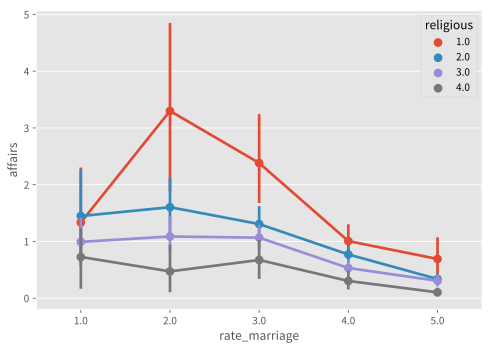

In [33]:
df = df_fair
sns.pointplot(data=df,
              x='rate_marriage',
              y='affairs',
              hue='religious')
# plt_savefig('affairs ~ 0 + C(rate_marriage):C(religious).png')

In [34]:
df = df_fair
res = smf.ols('affairs ~ C(rate_marriage <= 3)*C(religious >= 3)', df).fit()
display(
    res.summary(),
    sm.stats.anova_lm(res, typ=3)
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     88.42
Date:                Wed, 01 May 2019   Prob (F-statistic):           4.70e-56
Time:                        16:22:09   Log-Likelihood:                -13932.
No. Observations:                6366   AIC:                         2.787e+04
Df Residuals:                    6362   BIC:                         2.790e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                   0.6400      0.044     14.679      0.000       0.555       0.725
C(rate_marriage <= 3)[T.True]                               1.0878      0.087     12.573      0.000       0.918       1.257
C(religious >= 3)[T.True]                                  -0.2851      0.062     -4.634      0.000      -0.406      -0.165
C(rate_marriage <= 3)[T.True]:C(religious >= 3)[T.True]    -0.4505      0.131     -3.447      0.001      -0.707      -0.194
==============================================================================
Omnibus:                     9382.352   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5066474.241
Skew:                           8.820   Prob(JB):                         0.00
Kurtosis:                     140.075   Cond. No.                         6.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,sum_sq,df,F,PR(>F)
Intercept,1004.743902,1.0,215.484169,5.292292e-48
C(rate_marriage <= 3),737.101753,1.0,158.083824,7.892041e-36
C(religious >= 3),100.124651,1.0,21.473410,3.659199e-06
C(rate_marriage <= 3):C(religious >= 3),55.412513,1.0,11.884142,5.698042e-04
Residual,29664.270643,6362.0,NaN,NaN
